<a href="https://colab.research.google.com/github/fbalsrud/ITB2022/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **건강검진정보 데이터 불러오기 및 EDA**

In [107]:
import pandas as pd
import seaborn as sns

health_data = 'https://raw.githubusercontent.com/fbalsrud/ITB2022/main/health_data.csv'
health = pd.read_csv(health_data)

display(health.head())
print(health.info())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [108]:
health['시도코드'] = health['시도코드'].astype(str)
health['연령대코드(5세단위)'] = health['연령대코드(5세단위)'].astype(str)
health['청력(좌)'] = health['청력(좌)'].astype(str)
health['청력(우)'] = health['청력(우)'].astype(str)
health['구강검진수검여부'] = health['구강검진수검여부'].astype(str)
health['치아우식증유무'] = health['치아우식증유무'].astype(str)
health['치석'] = health['치석'].astype(str)

health['기준년도'] = pd.to_datetime(health['기준년도'])

health = health.rename(columns={"연령대코드(5세단위)": "age", "식전혈당(공복혈당)": "glucose", "총콜레스테롤": "cholesterol", "혈청크레아티닌": "creatinine", "(혈청지오티)AST": "AST"})
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   기준년도         10000 non-null  datetime64[ns]
 1   가입자일련번호      10000 non-null  int64         
 2   시도코드         10000 non-null  object        
 3   성별코드         10000 non-null  object        
 4   age          10000 non-null  object        
 5   신장(5Cm단위)    10000 non-null  int64         
 6   체중(5Kg 단위)   10000 non-null  int64         
 7   허리둘레         10000 non-null  float64       
 8   시력(좌)        10000 non-null  float64       
 9   시력(우)        10000 non-null  float64       
 10  청력(좌)        10000 non-null  object        
 11  청력(우)        10000 non-null  object        
 12  수축기혈압        9912 non-null   float64       
 13  이완기혈압        9912 non-null   float64       
 14  glucose      9912 non-null   float64       
 15  cholesterol  4044 non-null   float64       
 16  트리글리세

In [99]:
health.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,기준년도,가입자일련번호,시도코드,성별코드,age,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,creatinine,AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
count,10000,10000.00000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9912.000000,9912.00000,9912.000000,9912.000000,9998,9999,10000,10000,10000,10000
unique,1,NaN,17,2,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,2,2,3,4,1
top,1970-01-01 00:00:00.000002020,NaN,41,M,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Yes,0,nan,nan,12/29/2021
freq,10000,NaN,2495,5138,1798,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6231,5819,6749,6749,6749,10000
first,1970-01-01 00:00:00.000002020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1970-01-01 00:00:00.000002020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5000.50000,NaN,NaN,NaN,160.983500,63.034500,82.366100,0.933750,0.936750,...,0.848484,27.58979,26.789851,38.098668,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2886.89568,NaN,NaN,NaN,9.211608,12.205294,9.561973,0.662057,0.641378,...,0.301012,17.88442,23.735687,58.184579,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,NaN,NaN,NaN,130.000000,30.000000,53.000000,0.100000,0.100000,...,0.050000,3.00000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2500.75000,NaN,NaN,NaN,155.000000,55.000000,76.000000,0.700000,0.700000,...,0.700000,20.00000,16.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN


# **건강검진정보 시각화 #1**
**연령에 따른 음주 정도 변화**

: 대체로 나이가 증가함에 따라 감소하는 경향 보임. 50-54세 사이가 음주하는 비율이 가장 높고, 40-64세가 가장 많이 음주가 발생하는 5개 집단임.


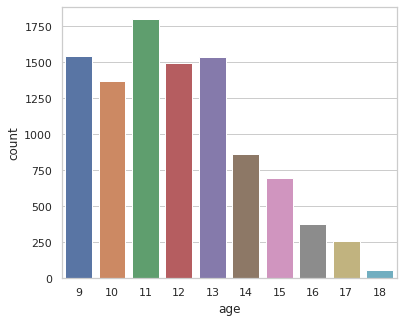

In [100]:
sns.countplot(data = health, x = 'age', order = [ '9', '10','11','12','13','14','15','16','17','18'])

# **건강검진정보 시각화 #2**
**연령 별 총콜레스테롤 수치의 분포**
- 평균적으로 가장 총콜레스테롤 수치가 높은 연령대는 55~59세
- 평균적으로 연령대별로 총콜레스테롤 수치에 큰 변동 없음. 고령일수록 평균 콜레스테롤 수치 감소하다 85세 이상에서 오히려 증가.
- 60~64세에 가장 많은 이상치 발생.
- 85세 이상 인구의 경우 평균이 3분위수에 가까운 것으로 보아 해당 연령대 내 콜레스테롤 수치가 높은 쪽에 분포가 치우쳐져 있음을 알 수 있음.

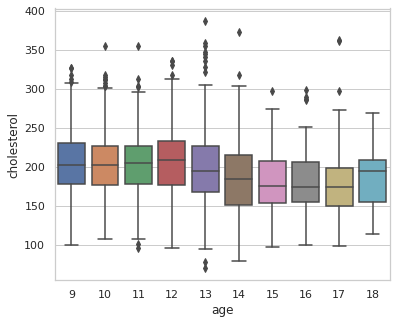

In [101]:
# 그래프 사이즈 지정
sns.set(rc={'figure.figsize':(6, 5)}) 
sns.set_style("whitegrid")

sns.boxplot(data = health, x = 'age', y = 'cholesterol', order = [ '9', '10','11','12','13','14','15','16','17','18'])

# **건강검진정보 시각화 #3**
**혈청크레아티닌 수치와 혈청지오티(AST) 사이의 상관관계**
- 혈청크레아티닌(근육의 발육과 운동에 관계함)과 AST(간 손상 정도)에는 특별한 상관관계 보이지 않음.
- 다만 크레아티닌 다소 증가함에 따라 AST도 함께 증가하다 크레아티닌 수치가 1.0을 넘어가자 다시 감소함.

**이에 혹시 혈청크레아티닌이 혈당수치와 관계 있을까하여 추가 분석함.**
- 높은 혈당 수치를 보이는 일부 개체가 혈청크레아티닌 수치 0.5-1.5사이에 위치하긴하지만, 0.8-1.7까지가 정상수치이므로 별다른 상관관계 존재하지 않음.

[(0.0, 2.0)]

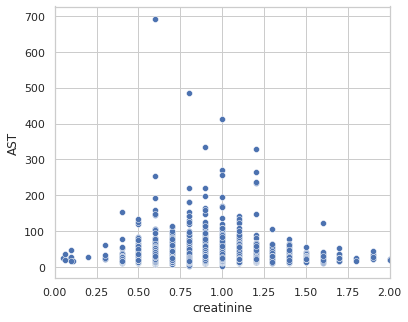

In [117]:
sns.scatterplot(data = health, x = 'creatinine', y = 'AST').set(xlim = (0,2))

[(0.0, 2.0)]

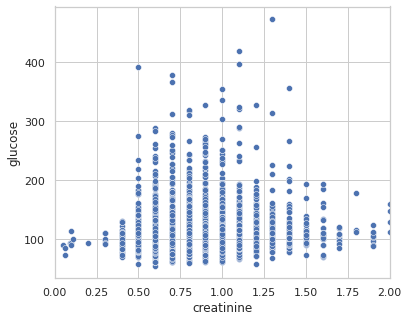

In [118]:
sns.scatterplot(data = health, x = 'creatinine', y = 'glucose').set(xlim = (0,2))